In [1]:
import numpy as np
import syndat
import pandas as pd
import os
from matplotlib.pyplot import *
# import ATARI
from ATARI import PiTFAll as pf
import h5py
h5py.enable_ipython_completer()


In [2]:
%matplotlib widget

In [3]:
# Peformance Test for Fitting ALgorithm (PiTFALl)
# pd.__version__

In [4]:
# Initialize particle pair and quantup spin groups of interest

ac = 0.81271    # scattering radius in 1e-12 cm 
M = 180.948030  # amu of target nucleus
m = 1           # amu of incident neutron
I = 3.5         # intrinsic spin, positive parity
i = 0.5         # intrinsic spin, positive parity [sic: perhaps, angular momentum?]
l_max = 1       # highest order l-wave to consider

spin_groups = [ (3.0,1,0) ] # (4.0,1,0) 
average_parameters = pd.DataFrame({ 'dE'    :   {'3.0':8.79, '4.0':4.99},
                                    'Gg'    :   {'3.0':46.4, '4.0':35.5},
                                    'gn2'    :   {'3.0':64.0, '4.0':64.0}  })

Ta_pair = syndat.particle_pair( ac, M, m, I, i, l_max,
                                spin_groups=spin_groups, average_parameters=average_parameters,
                                input_options={})


In [5]:

# initialize experimental setup
E_min_max = [100, 120]
input_options = { 'Add Noise': True,
            'Sample TURP':True,
            'Sample TOCS':True, 
            'Calculate Covariance': True,
            'Compression Points':[],
            'Grouping Factors':None}

experiment_parameters = {'bw': {'val':0.02,    'unc'   :   0}}

exp = syndat.experiment(E_min_max, 
                        input_options=input_options, 
                        experiment_parameters=experiment_parameters)
len(exp.energy_domain)

1109

In [6]:
# run a performance test with the PiTFAll module

# case_file = './perf_test_baron'
case_file = '/Users/noahwalton/Documents/GitHub/ATARI/Fitting/perf_test_baron.hdf5'
# case_file = './test.hdf5'

dataset_range = (0, 500)

# case_file = './perf_test_baron_rev2.hdf5'
# number_of_datasets = 27

path_to_application_exe = '/Applications/MATLAB_R2021b.app/bin/matlab'
path_to_fitting_script = "/Users/noahwalton/Documents/GitHub/ATARI/baron_fit_rev1.m"

# full_Ta181_RRR_JEFF = (4,2546)

vary_Erange = {'fullrange':(750,2546), 'maxres':5 , 'prob':0.001}

input_options = {   'Overwrite Syndats'    :   False, 
                    'Overwrite Fits'       :   False,
                    'Use HDF5'             :   True,
                    'Vary Erange'          :   vary_Erange} 



perf_test = pf.performance_test(dataset_range,
                                case_file,
                                input_options=input_options)

sample_data_df, out = perf_test.generate_syndats(Ta_pair, exp, 
                                                    solver='syndat_SLBW')
print(out)

User chose to NOT overwrite previously generated datasets in the file /Users/noahwalton/Documents/GitHub/ATARI/Fitting/perf_test_baron.hdf5.
Samples  0-500 already existed.
Samples 500-500 were generated.
If Syndat generation settings were changed these files should be overwriten.


In [7]:
# test = pd.DataFrame({'one':1,'two':2}, index=range(4,6))
# test
# np.count_nonzero(sample_data_df.NumRes.values>5)
# sample_data_df

In [8]:
# test accessing generated data
# sample_0 = pd.read_hdf(case_file, 'sample_0/syndat_par')
# sample_data_df = pd.read_hdf(case_file, 'test_stats/sample_data'


print(f"Average # Resonances: {np.mean(sample_data_df.NumRes)}")
print(f"Min/Max # Resonances: {np.min(sample_data_df.NumRes)}/{np.max(sample_data_df.NumRes)}")

print(f"Average Energy Points: {np.mean(sample_data_df.NumEpts)}")
print(f"Min/Max Energy Points: {np.min(sample_data_df.NumEpts)}/{np.max(sample_data_df.NumEpts)}")

print(f"Min theoretical SE: {np.min(sample_data_df.theo_exp_SE)}")

# sample_0

Average # Resonances: 3.304
Min/Max # Resonances: 1/7
Average Energy Points: 36.372
Min/Max Energy Points: 15/88
Min theoretical SE: 0.020499429824151323


In [9]:
out = perf_test.generate_fits(False)
print(out)

User chose to NOT run the fitting algorithm locally.
The data file /Users/noahwalton/Documents/GitHub/ATARI/Fitting/perf_test_baron.hdf5 has been prepared based on the selected overwrite options.
Please run samples 0-500


In [10]:
# f = h5py.File(case_file, 'r+')
# # del f['sample_0']['fit_par']
# # print(f['sample_0/est_par_baron'])
# # print(f['sample_10/exp_cov'][()])
# print(f['sample_0'].keys())
# # print(f['test_stats/sample_data'].keys())
# f.close()
# # pd.read_hdf(case_file, 'sample_0/exp_pw')
# # pd.read_hdf(case_file, 'sample_0/theo_par')

In [11]:
integral_FoMs, bv_pw_inwindow_df, sample_data, printout = perf_test.analyze(Ta_pair, exp, 'baron')
integral_FoMs_rev2, bv_pw_inwindow_df_rev2, sample_data_rev2, printout_rev2 = perf_test.analyze(Ta_pair, exp, 'baron_rev2')
# pd.read_hdf(case_file, 'integral_FoMs')

print(printout)

The mean/std of the fit to experimental chi2/dof is 2.055986662950429e-05 +/- 5.453066876753619e-05 in transmission space.
The mean/std of the fit to theorectical MSE is 9958.891706465101 +/- 28876.44943993003 in cross section space.


In [27]:
print(integral_FoMs.keys()) 
print(bv_pw_inwindow_df.keys()) 
print(sample_data.keys())

Index(['isample', 'fit_theo_MSE', 'fit_exp_SE', 'fit_exp_chi2',
       'fit_exp_chi2dof', 'theo_exp_SE', 'theo_exp_chi2', 'theo_exp_chi2dof'],
      dtype='object')
Index(['isample', 'WE_midpoint', 'window_bias_xs', 'window_bias_trans',
       'window_variance_xs', 'window_variance_trans'],
      dtype='object')
Index(['NumRes', 'NumEpts', 'theo_exp_SE'], dtype='object')


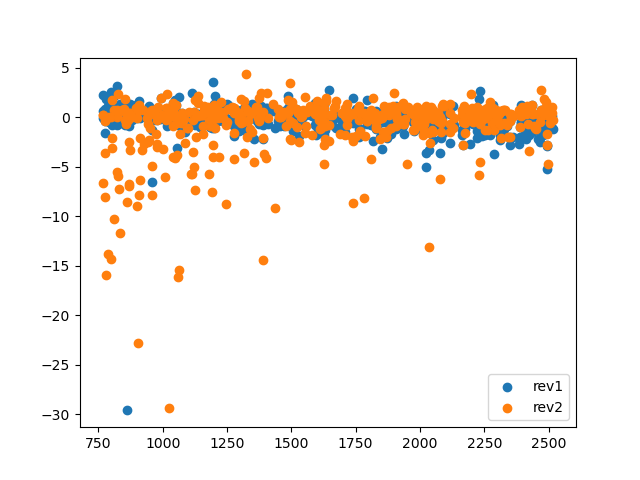

In [12]:
# bv_pw_inwindow_df
figure()
scatter(bv_pw_inwindow_df.WE_midpoint, bv_pw_inwindow_df.window_bias_xs, label='rev1')
scatter(bv_pw_inwindow_df_rev2.WE_midpoint, bv_pw_inwindow_df_rev2.window_bias_xs, label='rev2')
# scatter(bv_pw_inwindow_df.WE_midpoint, bv_pw_inwindow_df.window_variance_xs)
legend()

In [13]:
integral_FoMs

,isample,fit_theo_MSE,fit_exp_SE,fit_exp_chi2,fit_exp_chi2dof,theo_exp_SE,theo_exp_chi2,theo_exp_chi2dof
0,0,16475.207424,0.899326,0.001564,0.000034,0.163063,0.000928,0.000020
1,1,3486.184367,0.035864,0.000141,0.000006,0.043518,0.000129,0.000006
2,2,1352.120940,0.083183,0.000368,0.000012,0.104181,0.000387,0.000013
3,3,945.676122,0.046378,0.000205,0.000010,0.049216,0.000200,0.000010
4,4,6551.923094,0.058614,0.000203,0.000007,0.074506,0.000233,0.000008
...,...,...,...,...,...,...,...,...
495,495,11490.195098,0.779278,0.002004,0.000051,0.165604,0.000980,0.000025
496,496,6320.560155,0.046956,0.000168,0.000010,0.068127,0.000229,0.000013
497,497,13023.858776,0.294643,0.001889,0.000042,0.235436,0.001369,0.000030
498,498,6175.930529,0.733012,0.000753,0.000018,0.204459,0.000703,0.000016


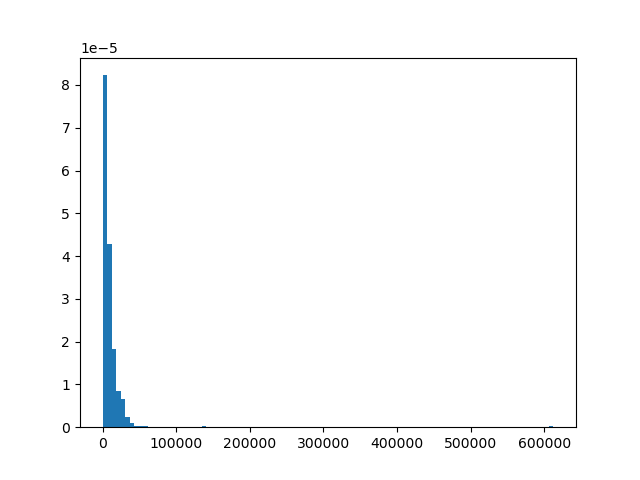

In [14]:
figure()
bins = hist(integral_FoMs.fit_theo_MSE, bins=100, density=True)

In [15]:
# figure()
# scatter(integral_FoMs.fit_theo_MSE, sample_data.NumRes, marker='.', s=35)
# ylim([-0.1,np.max(sample_data_df.NumRes)+1])
# xlim([0-np.max(integral_FoMs.fit_theo_MSE)/3,np.max(integral_FoMs.fit_theo_MSE)*1.1])

# figure()
# bins = hist(integral_FoMs.fit_theo_MSE, bins=20)

# pw_data, syndat_par_df, fit_par_df = pf.read_sample_case_data(case_file, 96)
# print(fit_par_df)
# figure()
# plot(pw_data.E, pw_data.est_trans)

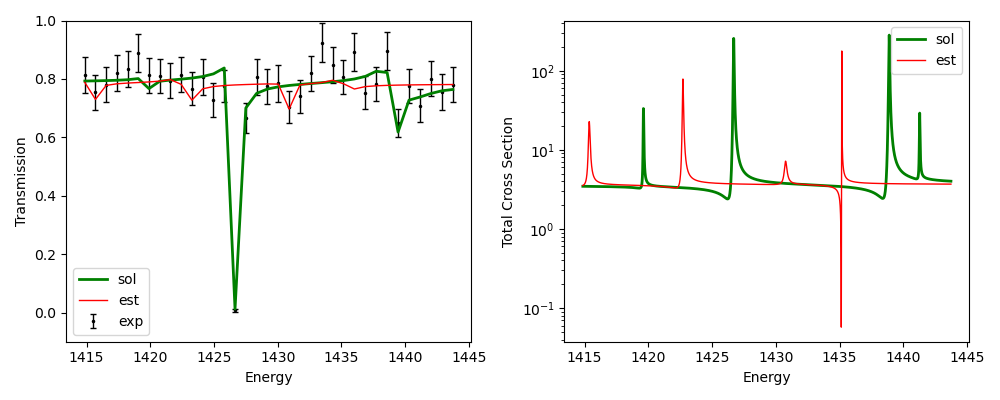

In [16]:
fig = pf.sample_case.plot(case_file, 73, 'baron_rev2')

In [17]:
fit_name = 'baron_rev2'
exp_pw_df, theo_pw_df, theo_par_df, est_par_df, exp_cov = pf.sample_case.read_sample_case_data(case_file, 80, fit_name)
theo_pw_df

,E,theo_xs,est_xs_baron,est_xs_baron_rev2
0,1391.597952,2.716064,2.905444,3.561133
1,1391.607957,2.713286,2.903005,3.561091
2,1391.617963,2.710491,2.900550,3.561049
3,1391.627968,2.707678,2.898079,3.561007
4,1391.637974,2.704848,2.895592,3.560965
...,...,...,...,...
2896,1420.574186,3.953853,3.757304,3.700780
2897,1420.584192,3.953254,3.757232,3.700725
2898,1420.594197,3.952657,3.757160,3.700669
2899,1420.604203,3.952063,3.757088,3.700613


In [18]:
# window_energy_midpoint  = (min(theo_pw_df.E)+max(theo_pw_df.E))/2

# print(window_energy_midpoint)
# assert window_energy_midpoint == (min(exp_pw_df.E)+max(exp_pw_df.E))/2

# window_bias_xs = np.mean(theo_pw_df.theo_xs-theo_pw_df[f'est_xs_{fit_name}'])
# window_bias_trans = np.mean(exp_pw_df.theo_trans-exp_pw_df[f'est_trans_{fit_name}'])
# print(window_bias_xs)
# print(window_bias_trans)

# window_variance_xs = np.mean( ( np.mean(theo_pw_df[f'est_xs_{fit_name}']) - theo_pw_df[f'est_xs_{fit_name}'] )**2 );
# window_variance_trans = np.mean( ( np.mean(exp_pw_df[f'est_trans_{fit_name}']) - exp_pw_df[f'est_trans_{fit_name}'] )**2 )
# print(window_variance_xs)
# print(window_variance_trans)

test1 = []
test2 = []
for i in range(5):
    test1.append([1,2,3])
    test2.append([4,5,6])

test = np.append(test1,test2, axis=1)
# test
pd.DataFrame(test, columns=['one','two','three', 'four', 'five', 'six'])

,one,two,three,four,five,six
0,1,2,3,4,5,6
1,1,2,3,4,5,6
2,1,2,3,4,5,6
3,1,2,3,4,5,6
4,1,2,3,4,5,6


In [19]:
# xs_tot_syndat, xs_tot_fit, new_egrid = pf.sample_case.calculate_xs(pw_data.E, Ta_pair, syndat_par_df, fit_par_df, True)

# n = exp.redpar.val.n  # atoms per barn or atoms/(1e-12*cm^2)
# trans_fit = np.exp(-n*xs_tot_fit)
# trans_syndat = np.exp(-n*xs_tot_syndat)

# from scipy import integrate
# est_sol_SE = integrate.trapezoid((xs_tot_syndat-xs_tot_fit)**2, new_egrid)
# print(est_sol_SE)

# print(syndat_par_df)
# print(fit_par_df)

# fig, ax = subplots(1,2, figsize=(10,4))
# ax[0].plot(new_egrid, xs_tot_fit)
# ax[0].plot(new_egrid, xs_tot_syndat)
# ax[0].set_yscale('log')

# ax[1].plot(new_egrid, trans_fit, 'r')
# ax[1].plot(new_egrid, trans_syndat, 'g')